<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/7_seminario_septiembre_20/7_seminario_sep_20_time_series_with_duplicates_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo]()

# Objetivo del seminario 7

* creación de fechas con la función `DatetimeIndex()` de pandas

In [1]:
# mapa conceptual

import networkx as nx 
#crear un grafo dirigido
G = nx.DiGraph() 

# agregar nodos
G.add_node('Series de Tiempo')
G.add_node('Timestamp')
G.add_node('Observacions')





# Time Series with Duplicate Indices


In some applications, there may be multiple data observations falling on a particular timestamp. Here is an example:  

En algunas aplicaciones, puede haber múltiples observaciones de datos que caen en una marca de tiempo particular. Aquí hay un ejemplo:

In [17]:
import numpy as np 
import pandas as pd
fechas = pd.DatetimeIndex(['20/9/2023', '22/9/2023', '22/9/2023', '22/9/2023', '25/9/2023']) # month/day/year_
fechas 

DatetimeIndex(['2023-09-20', '2023-09-22', '2023-09-22', '2023-09-22',
               '2023-09-25'],
              dtype='datetime64[ns]', freq=None)

In [18]:
datos_temperatura = [35, 37, 45, 37, 32]
serie_de_tiempo_como_serie = pd.Series(datos_temperatura, index = fechas) 
serie_de_tiempo_como_serie

2023-09-20    35
2023-09-22    37
2023-09-22    45
2023-09-22    37
2023-09-25    32
dtype: int64

In [19]:
type(serie_de_tiempo_como_serie)

pandas.core.series.Series


We can tell that the index is not unique by checking its `is_unique` property:  

Podemos saber que el índice no es único comprobando su propiedad `is_unique`:

In [20]:
serie_de_tiempo_como_serie.index 

DatetimeIndex(['2023-09-20', '2023-09-22', '2023-09-22', '2023-09-22',
               '2023-09-25'],
              dtype='datetime64[ns]', freq=None)

In [13]:
serie_de_tiempo_como_serie.index.is_unique 

True

In [17]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated:  

La indexación en esta serie de tiempo ahora producirá valores escalares o porciones dependiendo de si una marca de tiempo está duplicada:


In [21]:
serie_de_tiempo_como_serie['22/9/2023']

2023-09-22    37
2023-09-22    45
2023-09-22    37
dtype: int64

In [8]:
dup_ts['1/3/2023'] # not duplicated


4

In [9]:
dup_ts['1/2/2023'] # duplicated


2023-01-02    1
2023-01-02    2
2023-01-02    3
dtype: int64

Suppose you wanted to aggregate the data having non-unique timestamps. One way to do this is to use groupby and pass `level=0`:  

Supongamos que desea agregar los datos que tienen marcas de tiempo no únicas. Una forma de hacer esto es usar groupby y pasar `level=0`:


In [10]:
grouped = dup_ts.groupby(level=0)
grouped.mean()


2023-01-01    0.0
2023-01-02    2.0
2023-01-03    4.0
dtype: float64

In [18]:
grouped.count()


2023-01-01    1
2023-01-02    3
2023-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting  

## Rangos de fechas, frecuencias y cambios


Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications this is sufficient. However, it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges.   

Se supone que las series temporales genéricas en pandas son irregulares; es decir, no tienen una frecuencia fija. Para muchas aplicaciones esto es suficiente. Sin embargo, a menudo es deseable trabajar con una frecuencia fija, como diaria, mensual o cada 15 minutos, incluso si eso significa introducir valores faltantes en una serie de tiempo. Afortunadamente, pandas tiene un conjunto completo de frecuencias de series temporales estándar y herramientas para remuestreo, inferir frecuencias y generar rangos de fechas de frecuencia fija.

For example, you can convert the sample time series to be fixed daily frequency by calling resample:  

Por ejemplo, puede convertir la serie de tiempo de muestra para que tenga una frecuencia diaria fija llamando a resample:


In [22]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), \
                  datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)

In [23]:
ts


2011-01-02   -0.468237
2011-01-05    0.499285
2011-01-07   -0.565216
2011-01-08   -0.765556
2011-01-10   -0.223571
2011-01-12    0.992481
dtype: float64

In [24]:
resampler = ts.resample('D')


In [25]:
resampler 

In [26]:
ts 

2011-01-02   -0.468237
2011-01-05    0.499285
2011-01-07   -0.565216
2011-01-08   -0.765556
2011-01-10   -0.223571
2011-01-12    0.992481
dtype: float64

The string 'D' is interpreted as daily frequency.  
Conversion between frequencies or resampling is a big enough topic to have its own section later (Section 11.6, “Resampling and Frequency Conversion,” on page 348).  

Here I’ll show you how to use the base frequencies and multiples thereof.

In [ ]:
# Generating Date Ranges


While I used it previously without explanation, pandas.date_range is responsible for generating a DatetimeIndex with an indicated length according to a particular
frequency:


In [27]:
index = pd.date_range('2012-04-01', '2012-06-01')
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      


By default, date_range generates daily timestamps. If you pass only a start or end date, you must pass a number of periods to generate:


In [ ]:
In [76]: pd.date_range(start='2012-04-01', periods=20)
Out[76]:
DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
'2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
'2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
'2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
'2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
dtype='datetime64[ns]', freq='D')
In [77]: pd.date_range(end='2012-06-01', periods=20)
Out[77]:
DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
'2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
'2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
'2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
'2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
dtype='datetime64[ns]', freq='D')
The start and end dates define strict boundaries for the generated date index. For
example, if you wanted a date index containing the last business day of each month,
you would pass the 'BM' frequency (business end of month; see more complete listing
328 | Chapter 11: Time Series
of frequencies in Table 11-4) and only dates falling on or inside the date interval will
be included:
In [78]: pd.date_range('2000-01-01', '2000-12-01', freq='BM')
Out[78]:
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
'2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
'2000-09-29', '2000-10-31', '2000-11-30'],
dtype='datetime64[ns]', freq='BM')

# Tabla 11.4 

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/table_11_4.png?raw=true'>

In [ ]:
date_range by default preserves the time (if any) of the start or end timestamp:
In [79]: pd.date_range('2012-05-02 12:56:31', periods=5)
Out[79]:
DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
'2012-05-04 12:56:31', '2012-05-05 12:56:31',
'2012-05-06 12:56:31'],
dtype='datetime64[ns]', freq='D')
Sometimes you will have start or end dates with time information but want to gener‐
ate a set of timestamps normalized to midnight as a convention. To do this, there is a
normalize option:
In [80]: pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)
Out[80]:
DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
'2012-05-06'],
dtype='datetime64[ns]', freq='D')
Frequencies and Date Offsets
Frequencies in pandas are composed of a base frequency and a multiplier. Base fre‐
quencies are typically referred to by a string alias, like 'M' for monthly or 'H' for
hourly. For each base frequency, there is an object defined generally referred to as a
date offset. For example, hourly frequency can be represented with the Hour class:
In [81]: from pandas.tseries.offsets import Hour, Minute
In [82]: hour = Hour()
In [83]: hour
Out[83]: <Hour>


You can define a multiple of an offset by passing an integer:


In [ ]:
In [84]: four_hours = Hour(4)
In [85]: four_hours
Out[85]: <4 * Hours>
In most applications, you would never need to explicitly create one of these objects,
instead using a string alias like 'H' or '4H'. Putting an integer before the base fre‐
quency creates a multiple:
In [86]: pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')
Out[86]:
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
'2000-01-01 08:00:00', '2000-01-01 12:00:00',
'2000-01-01 16:00:00', '2000-01-01 20:00:00',
'2000-01-02 00:00:00', '2000-01-02 04:00:00',
'2000-01-02 08:00:00', '2000-01-02 12:00:00',
'2000-01-02 16:00:00', '2000-01-02 20:00:00',

In [ ]:
'2000-01-03 00:00:00', '2000-01-03 04:00:00',
'2000-01-03 08:00:00', '2000-01-03 12:00:00',
'2000-01-03 16:00:00', '2000-01-03 20:00:00'],
dtype='datetime64[ns]', freq='4H')


In [ ]:
Many offsets can be combined together by addition:
In [87]: Hour(2) + Minute(30)
Out[87]: <150 * Minutes>
Similarly, you can pass frequency strings, like '1h30min', that will effectively be
parsed to the same expression:
In [88]: pd.date_range('2000-01-01', periods=10, freq='1h30min')
Out[88]:
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
'2000-01-01 03:00:00', '2000-01-01 04:30:00',
'2000-01-01 06:00:00', '2000-01-01 07:30:00',
'2000-01-01 09:00:00', '2000-01-01 10:30:00',
'2000-01-01 12:00:00', '2000-01-01 13:30:00'],
dtype='datetime64[ns]', freq='90T')
Some frequencies describe points in time that are not evenly spaced. For example, 'M'
(calendar month end) and 'BM' (last business/weekday of month) depend on the
number of days in a month and, in the latter case, whether the month ends on a
weekend or not. We refer to these as anchored offsets.
Refer back to Table 11-4 for a listing of frequency codes and date offset classes avail‐
able in pandas.
Users can define their own custom frequency classes to provide
date logic not available in pandas, though the full details of that are
outside the scope of this book.
Week of month dates
One useful frequency class is “week of month,” starting with WOM. This enables you to
get dates like the third Friday of each month:
In [89]: rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
In [90]: list(rng)


In [ ]:
Out[90]:
[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),

In [ ]:
Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]
Shifting (Leading and Lagging) Data
“Shifting” refers to moving data backward and forward through time. Both Series and
DataFrame have a shift method for doing naive shifts forward or backward, leaving
the index unmodified:
In [91]: ts = pd.Series(np.random.randn(4),
....: index=pd.date_range('1/1/2000', periods=4, freq='M'))
In [92]: ts


In [ ]:
Out[92]:
2000-01-31 -0.066748
2000-02-29 0.838639
2000-03-31 -0.117388
2000-04-30 -0.517795
Freq: M, dtype: float64
In [93]: ts.shift(2)
Out[93]:
2000-01-31 NaN
2000-02-29 NaN
2000-03-31 -0.066748
2000-04-30 0.838639
Freq: M, dtype: float64
In [94]: ts.shift(-2)
Out[94]:
2000-01-31 -0.117388
2000-02-29 -0.517795
2000-03-31 NaN
2000-04-30 NaN
Freq: M, dtype: float64


When we shift like this, missing data is introduced either at the start or the end of the time series.  
A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns. This is expressed as:


In [ ]:
ts / ts.shift(1) - 1


In [ ]:
Because naive shifts leave the index unmodified, some data is discarded. 

In [ ]:
Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of
simply the data:


In [ ]:
In [95]: ts.shift(2, freq='M')
Out[95]:
2000-03-31 -0.066748
2000-04-30 0.838639

In [ ]:
2000-05-31 -0.117388
2000-06-30 -0.517795
Freq: M, dtype: float64
Other frequencies can be passed, too, giving you some flexibility in how to lead and
lag the data:
In [96]: ts.shift(3, freq='D')
Out[96]:
2000-02-03 -0.066748
2000-03-03 0.838639
2000-04-03 -0.117388
2000-05-03 -0.517795
dtype: float64
In [97]: ts.shift(1, freq='90T')
Out[97]:
2000-01-31 01:30:00 -0.066748
2000-02-29 01:30:00 0.838639
2000-03-31 01:30:00 -0.117388
2000-04-30 01:30:00 -0.517795
Freq: M, dtype: float64
The T here stands for minutes.
Shifting dates with offsets
The pandas date offsets can also be used with datetime or Timestamp objects:
In [98]: from pandas.tseries.offsets import Day, MonthEnd
In [99]: now = datetime(2011, 11, 17)
In [100]: now + 3 * Day()
Out[100]: Timestamp('2011-11-20 00:00:00')
If you add an anchored offset like MonthEnd, the first increment will “roll forward” a
date to the next date according to the frequency rule:
In [101]: now + MonthEnd()
Out[101]: Timestamp('2011-11-30 00:00:00')
In [102]: now + MonthEnd(2)
Out[102]: Timestamp('2011-12-31 00:00:00')
Anchored offsets can explicitly “roll” dates forward or backward by simply using their
rollforward and rollback methods, respectively:
In [103]: offset = MonthEnd()
In [104]: offset.rollforward(now)
Out[104]: Timestamp('2011-11-30 00:00:00')

In [ ]:
In [105]: offset.rollback(now)
Out[105]: Timestamp('2011-10-31 00:00:00')
A creative use of date offsets is to use these methods with groupby:
In [106]: ts = pd.Series(np.random.randn(20),
.....: index=pd.date_range('1/15/2000', periods=20, freq='4d'))
In [107]: ts


In [ ]:
In [108]: ts.groupby(offset.rollforward).mean()
Out[108]:
2000-01-31 -0.005833
2000-02-29 0.015894
2000-03-31 0.150209
dtype: float64
Of course, an easier and faster way to do this is using resample (we’ll discuss this in
much more depth in Section 11.6, “Resampling and Frequency Conversion,” on page
348):
In [109]: ts.resample('M').mean()
Out[109]:
2000-01-31 -0.005833
2000-02-29 0.015894
2000-03-31 0.150209
Freq: M, dtype: float64
334 | Chapter 11: Time Series


# 11.4 Time Zone Handling


Working with time zones is generally considered one of the most unpleasant parts of time series manipulation. As a result, many time series users choose to work with time series in coordinated universal time or UTC, which is the successor to Greenwich Mean Time and is the current international standard. Time zones are expressed as offsets from UTC; for example, New York is four hours behind UTC during daylight saving time and five hours behind the rest of the year.


In Python, time zone information comes from the third-party pytz library (installa‐
ble with pip or conda), which exposes the Olson database, a compilation of world
time zone information. This is especially important for historical data because the
daylight saving time (DST) transition dates (and even UTC offsets) have been
changed numerous times depending on the whims of local governments. In the Uni‐
ted States, the DST transition times have been changed many times since 1900!
For detailed information about the pytz library, you’ll need to look at that library’s
documentation. As far as this book is concerned, pandas wraps pytz’s functionality so
you can ignore its API outside of the time zone names. Time zone names can be
found interactively and in the docs:


In [ ]:
In [110]: import pytz
In [111]: pytz.common_timezones[-5:]
Out[111]: ['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']


In [ ]:
To get a time zone object from pytz, use pytz.timezone:
In [112]: tz = pytz.timezone('America/New_York')
In [113]: tz
Out[113]: <DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>
Methods in pandas will accept either time zone names or these objects.


# Acceso a los datos de la estación de Caucasia



1. Lectura del script de Luisa (Marco)
2. Para la semana del 23 al 27 de septiembre Janis nos presenta lo que sabemos acerca del acceso y visualización de los datos de AMSC. 

In [1]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/A2022M11/DatosEstacion2022-11-16.csv'

df = pd.read_csv(url) 
df 

,Tiempo Sistema,Bar Trend,Next Record,Barometer,Inside Temperature,Inside Humidity,Outside Temperature,Wind Speed,10 Min Avg Wind Speed,Wind Direction,...,Soil & Leaf Alarms,Transmitter Battery Status,Console Battery Voltage,Forecast Icons,Forecast Rule number,Time of Sunrise,Time of Sunset,<LF> = 0x0A,<CR> = 0x0D,CRC
0,2022-11-16 17:52:56,O,650,29763,881,73,839,1,2,305,...,0,0,770,3,192,553,1738,10,13,43122
1,2022-11-16 17:53:01,O,650,29763,881,73,839,1,2,305,...,0,0,770,3,192,553,1738,10,13,43122
2,2022-11-16 17:54:00,O,650,29764,882,73,839,1,2,49,...,0,0,770,3,192,553,1738,10,13,32819
3,2022-11-16 17:55:00,O,650,29765,882,73,838,1,2,43,...,0,0,770,3,192,553,1738,10,13,54035
4,2022-11-16 17:56:00,O,650,29764,882,73,838,2,2,28,...,0,0,770,3,192,553,1738,10,13,57296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2022-11-16 23:55:00,O,662,29822,849,77,770,0,0,313,...,0,0,771,6,45,553,1738,10,13,48537
364,2022-11-16 23:56:00,O,662,29820,850,77,771,0,0,313,...,0,0,771,6,45,553,1738,10,13,2713
365,2022-11-16 23:57:00,O,662,29819,849,77,770,0,0,313,...,0,0,771,6,45,553,1738,10,13,6794
366,2022-11-16 23:58:00,O,662,29820,850,77,770,0,0,313,...,0,0,771,6,45,553,1738,10,13,1428


In [2]:
df.keys() 

Index(['Tiempo Sistema', 'Bar Trend', 'Next Record', 'Barometer',
       'Inside Temperature', 'Inside Humidity', 'Outside Temperature',
       'Wind Speed', '10 Min Avg Wind Speed', 'Wind Direction',
       'Extra Temperatures', 'Soil Temperatures', 'Leaf Temperatures',
       'Outside Humidity', 'Extra Humidties', 'Rain Rate', 'UV',
       'Solar Radiation', 'Storm Rain', 'Start Date of current Storm',
       'Day Rain', 'Month Rain', 'Year Rain', 'Day ET', 'Month ET', 'Year ET',
       'Soil Moistures', 'Leaf Wetnesses', 'Inside Alarms', 'Rain Alarms',
       'Outside Alarms', 'Extra Temp/Hum Alarms', 'Soil & Leaf Alarms',
       'Transmitter Battery Status', 'Console Battery Voltage',
       'Forecast Icons', 'Forecast Rule number', 'Time of Sunrise',
       'Time of Sunset', '<LF> = 0x0A', '<CR> = 0x0D', 'CRC'],
      dtype='object')

In [3]:
df['Outside Temperature']

0      839
1      839
2      839
3      838
4      838
      ... 
363    770
364    771
365    770
366    770
367    770
Name: Outside Temperature, Length: 368, dtype: int64

In [4]:
type(df['Outside Temperature'])

pandas.core.series.Series

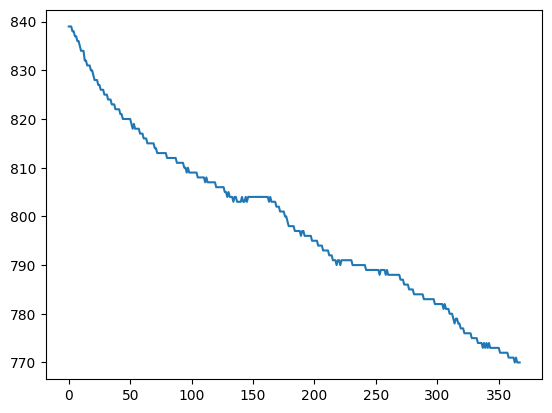

In [5]:
import matplotlib.pyplot as plt 

plt.plot(df['Outside Temperature'])

## Conclusiones

* La temperatura en Caucasis, el 16 de noviembre de 2022 era decreciente. 

# Referencias

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png'>